In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# 모델 생성 목적을 암을 예측하기 위해서 만들 것이라서 종양을 0으로, 암을 1로 바꿔주기
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()

tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)

sample['target'].value_counts()


0    357
1     30
Name: target, dtype: int64

In [3]:
sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,43.500,0.030570,0.010830,0.03576,0.002967,732.4,0.16970,0.087510,0.16830,0.06540,...,1269.0,0.61100,0.20240,0.63350,0.09876,149.30,20.270,0.16410,0.4027,36.71
29,61.100,0.030330,0.013540,0.03407,0.003742,955.1,0.11570,0.079530,0.09875,0.06149,...,1227.0,0.28120,0.14560,0.24890,0.07919,134.90,20.010,0.12550,0.2756,19.52
30,105.000,0.033740,0.011580,0.05196,0.004560,1088.0,0.18870,0.124400,0.23190,0.06197,...,1670.0,0.42570,0.18480,0.61330,0.09782,160.50,23.150,0.14910,0.3444,34.01
31,41.000,0.034140,0.010440,0.04205,0.005667,440.6,0.15160,0.051820,0.12180,0.07799,...,888.7,0.57750,0.15460,0.69560,0.14020,119.40,16.820,0.16370,0.4761,28.12


# 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        sample.drop('target',axis=1),
        sample['target'],
        random_state = 42
)

# 모델 정의 및 학습

In [5]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression은 회귀라는 이름이 붙어있지만 사실은 분류이다.

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

# 정확도(Accuracy)확인

## 모델 예측 정확도 확인

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr_pred)

0.9690721649484536

## 잘못된 예측의 정확도 확인할 것
- 돌팔이 의사 曰 "암인 사람도 어차피 많이 없는데 그냥 다 종양이라고 해볼까?"

In [7]:
dolpal_pred = np.zeros(shape=y_test.shape)
dolpal_pred


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
accuracy_score(y_test, dolpal_pred)

# 90%의 정확도라니.. 꽤나 높다...

0.9072164948453608

즉, 정확도만 보고 분류기의 성능을 판단하는 것은 위험!!
따라서 더 세밀한 방식이 필요 (ex. 오차행렬..)

# 오차행렬(혼동행렬- Confusion Matrix)

In [9]:
from sklearn.metrics import confusion_matrix

# LogisticRegression의 혼동행렬
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print('모델의 오차행렬: \n{}'.format(lr_conf_matrix))

모델의 오차행렬: 
[[87  1]
 [ 2  7]]


- 해석
    - 1: FP (암이 아닌데 암이라고 한것)
    - 2: FN (암인데 암이 아니라고 한 것)
    - **FN을 낮추는 방식으로 성능을 올려야 함**

In [10]:
# 돌팔이의 혼동 행렬
dolpal_conf_matrix = confusion_matrix(y_test, dolpal_pred)
print('돌팔이의 오차행렬: \n{}'.format(dolpal_conf_matrix))

돌팔이의 오차행렬: 
[[88  0]
 [ 9  0]]


- 해석
    - 돌팔이의 오차행렬은 1로 예측(암이라고 예측)한 것이 하나도 없음 (FP, TP)
    - FN이 9나 되어버림. (암인데 암이 아니라고 한 것)

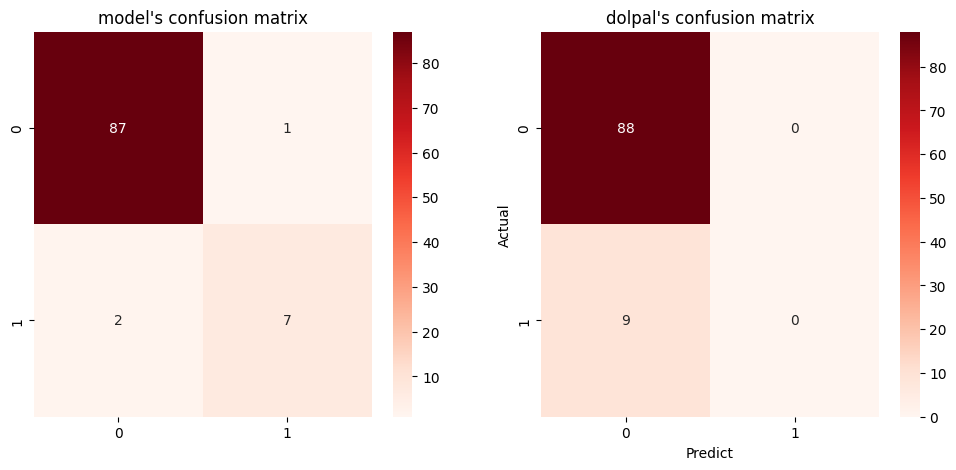

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.heatmap(
    lr_conf_matrix,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

plt.subplot(122)
ax = sns.heatmap(
    dolpal_conf_matrix,
    annot=True,
    cmap="Reds",
)

ax.set_title("dolpal's confusion matrix")

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()


# 정밀도, 재현율 확인

- 정밀도
    - TP/(FP+TP)
    - 양성(Positive)로 예측했을 때 실제로 맞은 비율
- 재현율
    - TP/(FN+TP)
    - 실제 양성인 데이터를 맞춘 비율

In [12]:
from sklearn.metrics import precision_score, recall_score

In [13]:
# 모델의 정밀도, 재현율

print("정밀도: {:.3f}".format(precision_score(y_test, lr_pred)))
print("재현율: {:.3f}".format(recall_score(y_test, lr_pred)))

정밀도: 0.875
재현율: 0.778


- 재현율이 더 낮다. 
- 따라서 우리는 재현율을 높여야 한다.

In [14]:
# 돌팔이의 정밀도, 재현율
print("돌팔이 정밀도: {:.3f}".format(precision_score(y_test, dolpal_pred)))
print("돌팔이 재현율: {:.3f}".format(recall_score(y_test, dolpal_pred)))

돌팔이 정밀도: 0.000
돌팔이 재현율: 0.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 정확도 & 정밀도,재현율을 언제 사용해야 하는가?
- Accuracy 정확도 
    - 설명할 때 사용하면 됨. 홍보 용도
    - "우리모델 완성했고, 정확도는 ~~ 입니다."
    
    
- 정밀도, 재현율
    - 내부 지표
    - 개발 할 때 개발자들끼리 사용
   

# 정밀도 - 재현율 트레이드 오프
- predict_proba : 각 클래스에 대한 예측 확률 확인

In [15]:
lr_pred_proba = model.predict_proba(X_test) # 예측 확률
lr_pred = model.predict(X_test) # 예측결과

print(lr_pred_proba[:3])
print()
print(lr_pred[:3])

[[9.99277955e-01 7.22045316e-04]
 [9.99317729e-01 6.82270968e-04]
 [9.99999986e-01 1.35283319e-08]]

[0 0 0]


In [16]:
lr_pred_proba[1][0]+lr_pred_proba[1][1]

1.0

기본적인 predict_proba는 threshold default가 0.5

# Binarizer 클래스 사용하기
- 지정한 threshold보다 작으면 0으로, 크면 1로 분류해주는 클래스
- 예측 결과에 대한 후처리

In [17]:
from sklearn.preprocessing import Binarizer


In [18]:
# 예시
sample_data = [[0.1,0.7],
              [1.1,0.2],
              [0.3,1.2]]

binarizer = Binarizer(threshold=0.5)
binarizer.fit_transform(sample_data)

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [19]:
X_test

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
513,37.110,0.018120,0.008648,0.030350,0.002281,658.8,0.08918,0.04349,0.08222,0.05640,...,862.0,0.1928,0.09186,0.24920,0.07048,108.50,16.76,0.12230,0.2626,17.24
298,20.560,0.013770,0.005243,0.010790,0.001957,633.1,0.05220,0.01374,0.02475,0.05586,...,819.7,0.2167,0.07530,0.15650,0.07676,105.80,16.22,0.09445,0.2636,25.26
187,17.860,0.008704,0.011850,0.019780,0.001671,420.3,0.06141,0.03239,0.03809,0.06095,...,521.5,0.1040,0.10990,0.15210,0.07097,84.42,13.01,0.13230,0.2572,21.39
452,13.860,0.025890,0.009166,0.029410,0.004302,442.5,0.06450,0.01945,0.04055,0.06104,...,523.7,0.1856,0.07116,0.18110,0.08194,85.07,13.09,0.12080,0.2447,37.88
376,7.228,0.076430,0.029190,0.153500,0.012200,338.3,0.16600,0.05941,0.22800,0.08450,...,351.9,0.3619,0.14650,0.60300,0.12000,76.51,10.85,0.11430,0.2597,22.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,8.955,0.009169,0.005740,0.008732,0.001366,468.5,0.06307,0.02647,0.02958,0.05808,...,564.9,0.2074,0.10700,0.17910,0.07592,87.22,13.61,0.12920,0.3110,19.27
518,34.370,0.023290,0.012440,0.014050,0.003299,493.1,0.16610,0.05303,0.04825,0.07253,...,674.7,0.2961,0.10960,0.12460,0.08893,99.31,15.05,0.14560,0.2582,24.37
66,14.200,0.017550,0.009333,0.017140,0.004237,269.4,0.07773,0.01504,0.02172,0.06899,...,330.7,0.1664,0.06517,0.09412,0.09211,67.03,10.41,0.15480,0.2878,31.56
149,21.470,0.015920,0.005828,0.017800,0.001976,585.0,0.06376,0.01329,0.02881,0.05580,...,725.9,0.1824,0.06019,0.15640,0.07014,97.19,15.34,0.09711,0.2350,22.46


In [20]:
model.predict_proba(X_test)
# index0 : 음성 index1: 암

array([[9.99277955e-01, 7.22045316e-04],
       [9.99317729e-01, 6.82270968e-04],
       [9.99999986e-01, 1.35283319e-08],
       [9.99971619e-01, 2.83811234e-05],
       [9.99999999e-01, 1.33687847e-09],
       [9.99972012e-01, 2.79882348e-05],
       [9.99865665e-01, 1.34335394e-04],
       [9.99999837e-01, 1.63025501e-07],
       [9.99956504e-01, 4.34956147e-05],
       [1.00000000e+00, 1.64968400e-11],
       [8.19979414e-01, 1.80020586e-01],
       [1.00000000e+00, 3.76563327e-16],
       [9.99993717e-01, 6.28259290e-06],
       [1.00000000e+00, 8.56087278e-12],
       [1.45083946e-03, 9.98549161e-01],
       [9.99989262e-01, 1.07379391e-05],
       [9.99930366e-01, 6.96342900e-05],
       [9.99999730e-01, 2.69561739e-07],
       [1.00000000e+00, 4.85052474e-11],
       [9.98521421e-01, 1.47857904e-03],
       [9.99999913e-01, 8.70488811e-08],
       [9.99999885e-01, 1.14586600e-07],
       [9.99999473e-01, 5.27327916e-07],
       [9.99999988e-01, 1.23952930e-08],
       [9.999999

In [21]:
# 임계값(threshold) = 0.5일 때 오차행렬 확인
lr_pred_proba_1 = model.predict_proba(X_test)[:,1].reshape(-1,1)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)
custom_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

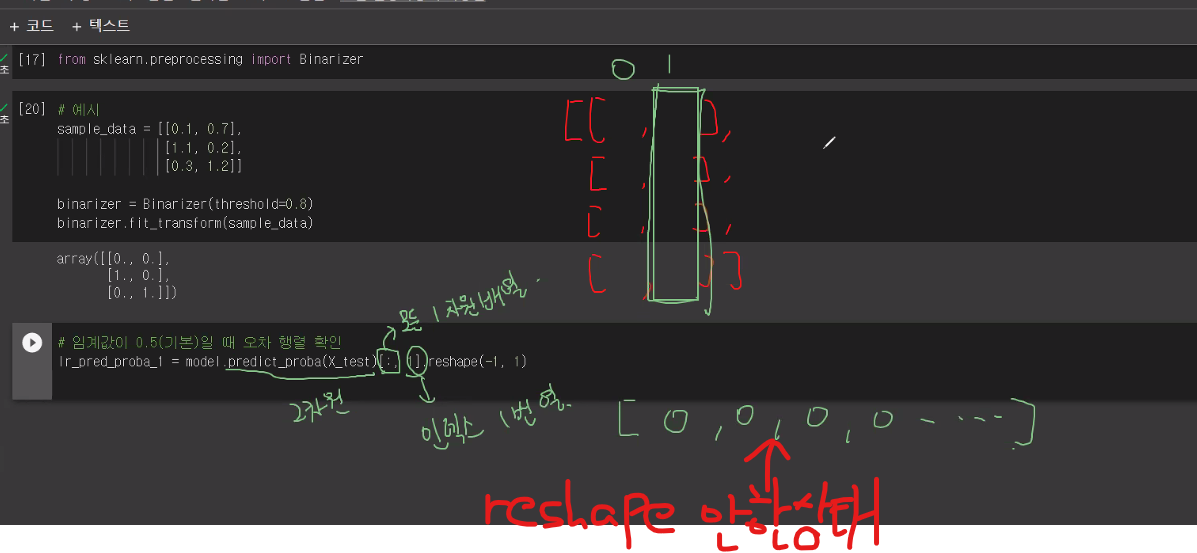

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
    confusion = confusion_matrix( y_test, pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    accuracy = accuracy_score(y_test, pred)
    hmap_ax = sns.heatmap(
        confusion,
        annot=True,
        cmap="Reds",
        ax=ax
  )
    hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

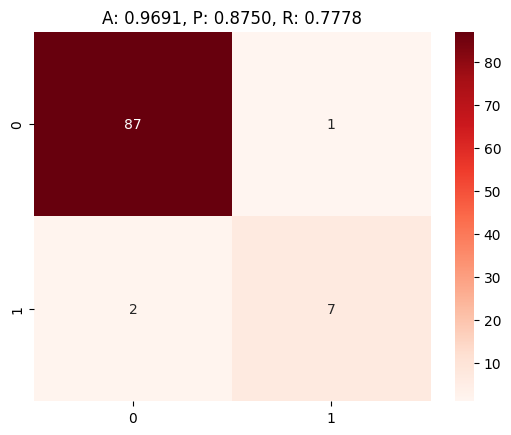

In [23]:
get_clf_eval(y_test, custom_predict)

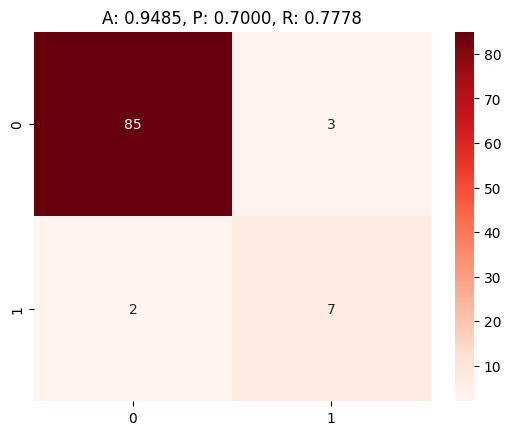

In [24]:
# threshold = 0.2일 때
binarizer = Binarizer(threshold=0.1)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

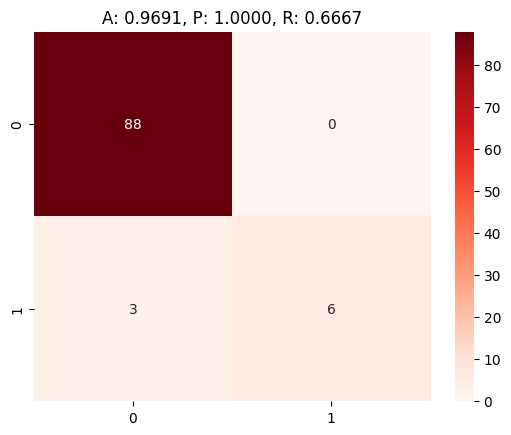

In [25]:
binarizer = Binarizer(threshold=0.8)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


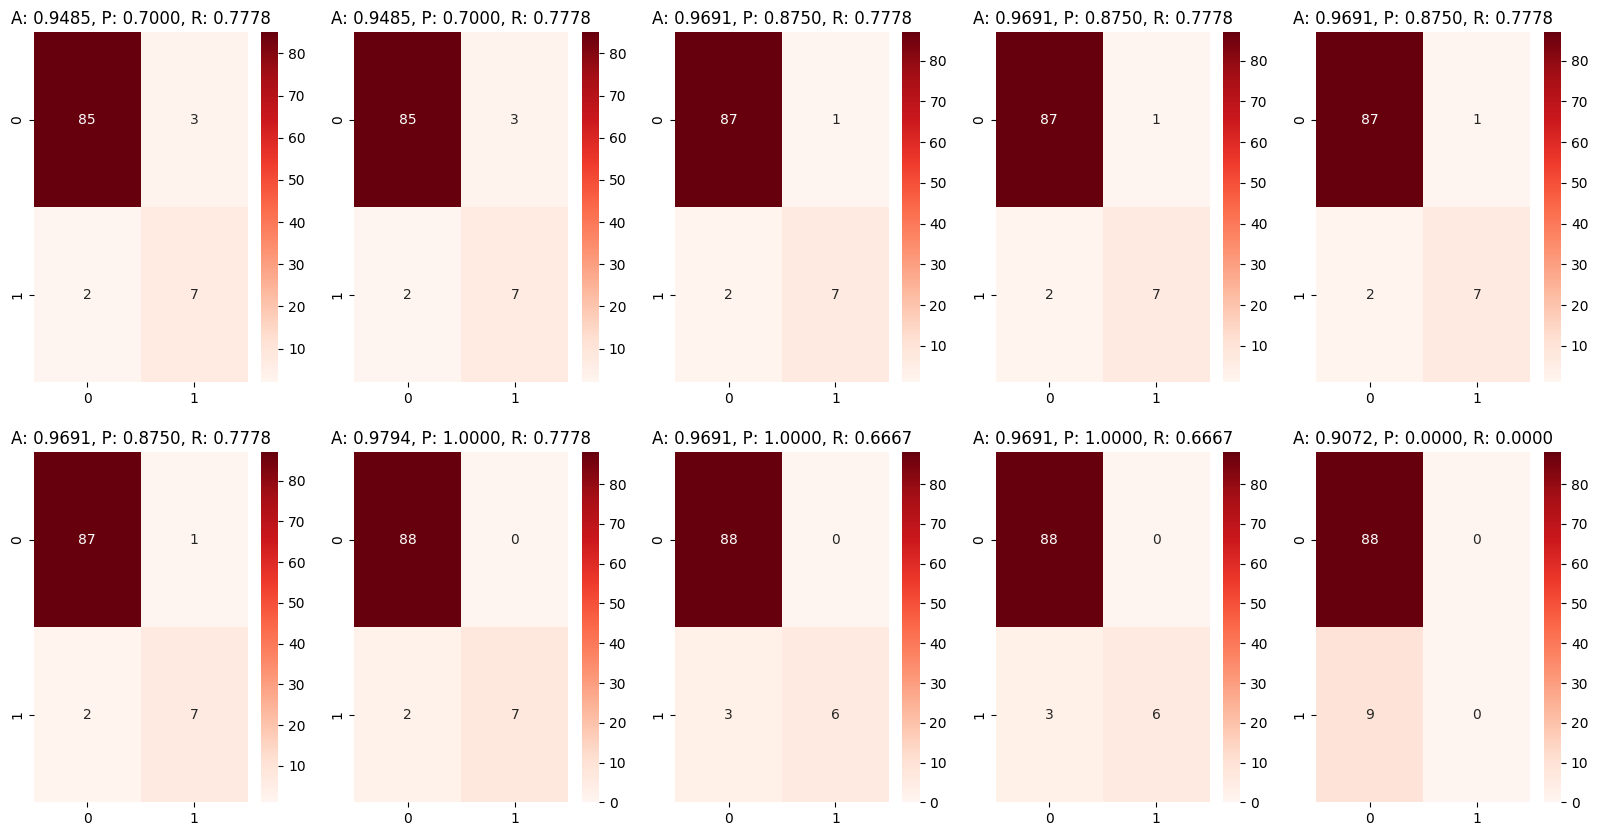

In [26]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold, ax in zip(thresholds, axes.ravel()):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)
        
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds )

In [35]:
precision,recall, threshold = precision_recall_curve( y_test, model.predict_proba(X_test)[:, 1] )

In [41]:
threshold.shape[0]
precision.shape[0]
recall.shape[0]

97

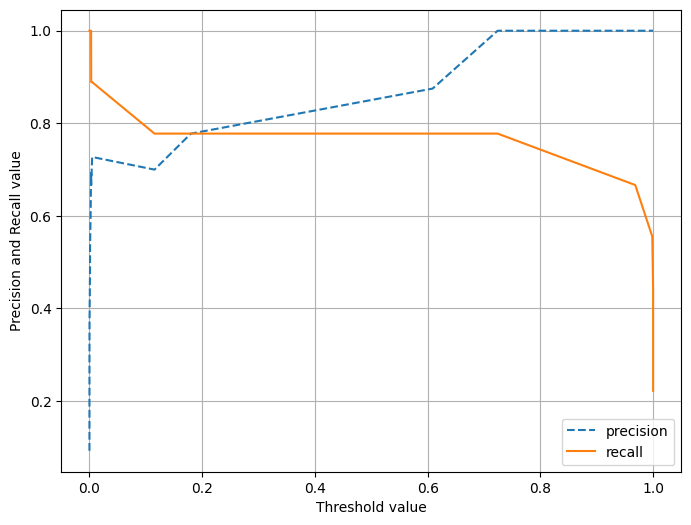

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )

# F1 Score

In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, lr_pred)
f1

0.823529411764706

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


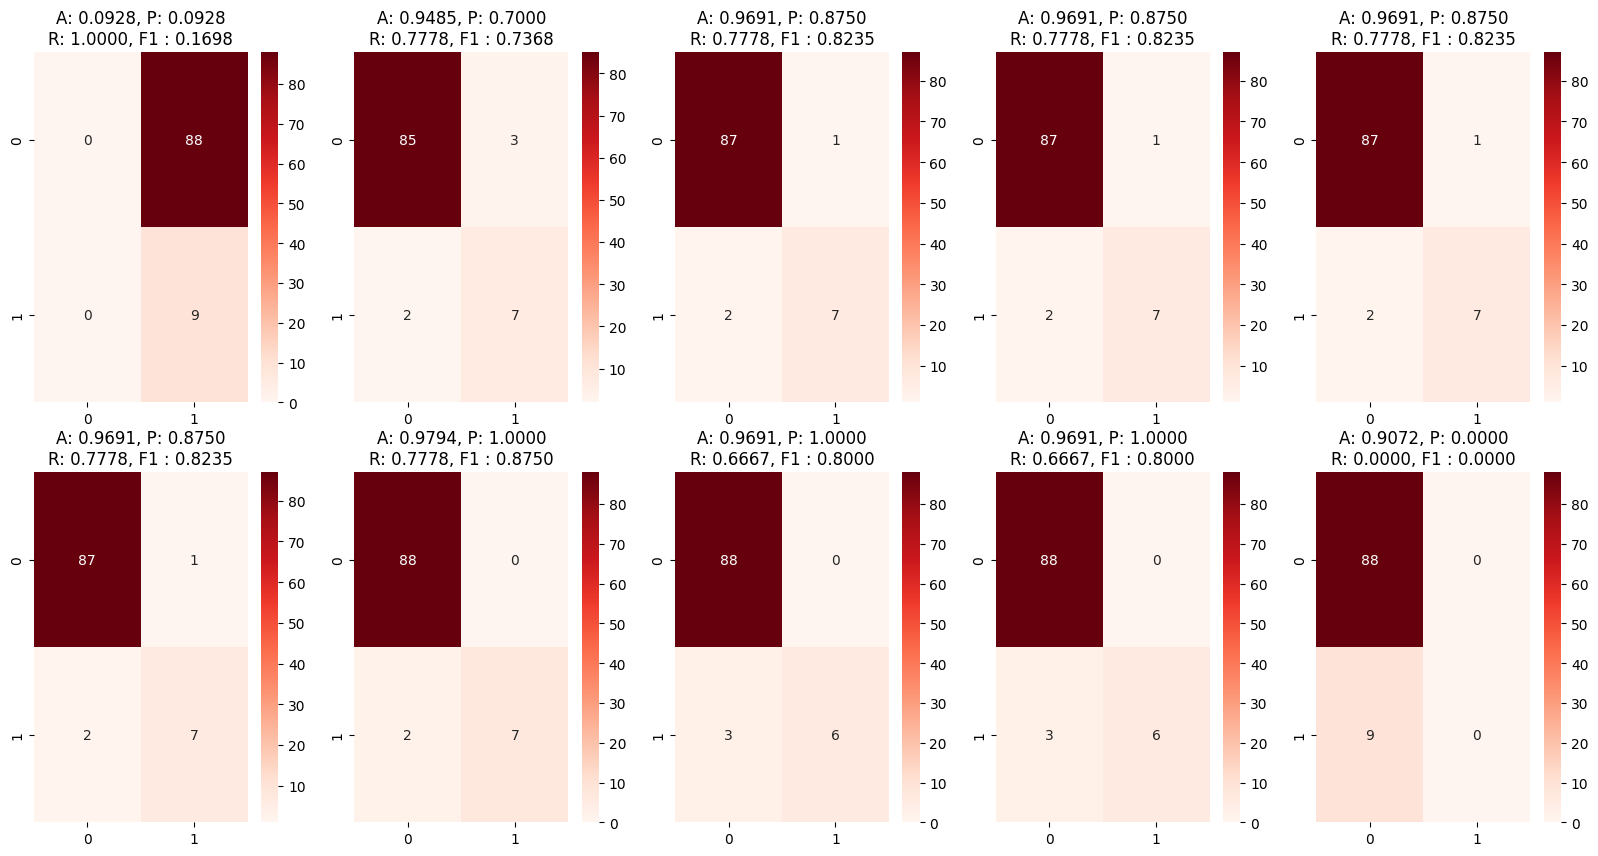

In [29]:
def get_clf_eval(y_test, pred, ax=None):
    confusion = confusion_matrix( y_test, pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    hmap_ax = sns.heatmap(
        confusion,
        annot=True,
        cmap="Reds",
        ax=ax
  )
  
    hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}\nR: {2:.4f}, F1 : {3:.4f}'.format(accuracy , precision ,recall, f1))

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds)

# Roc-curve

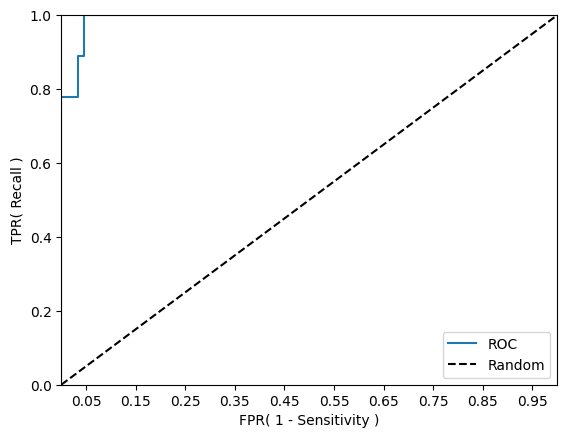

In [30]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1] )

In [31]:
from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9912
